# Statistics Inference II
Dalam meeting 11 ini anda akan belajar mengenai statistik inferensia. Untuk topic pembahasannya adalah sebagai berikut: \\

1. Distribusi Normal 
2. Central Limit Theorem (CLT) 
3.   Statistics Inference 
    - Point Estimation
    - Interval Estimastion
4. Z Score

## Import Packages

In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import random
from numpy import mean
from numpy.random import seed
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

## Normal Distribution
Distribusi normal adalah sebuah fungsi probabilitas yang menunjukkan distribusi atau penyebaran suatu variabel. Fungsi tersebut umumnya dibuktikan oleh sebuah grafik simetris yang disebut kurva lonceng (bell curve).

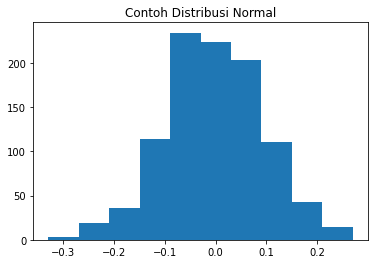

In [ ]:
# Membuat 1000 data dengan menentukan nilai mean dan standart deviation
mu, sigma = 0, 0.1 # mean dan standard deviation
dist_normal = np.random.normal(mu, sigma, 1000)

# Memvisualikan data
plt.hist(dist_normal, bins=10)
plt.title("Contoh Distribusi Normal")
plt.show()

## Central Limit Theorem

Jika kita mengambil banyak sekali sampel berukuran n dari populasi yang sama, kita akan mendapatkan banyak sekali nilai yang berbeda untuk mean sampel. Pengumpulan sampel yang dihasilkan kemudian dapat dilihat sebagai variabel acak baru dengan mean dan deviasi standarnya sendiri. Distribusi probabilitas mean sampel ini disebut distribusi mean sampel, atau **distribusi sampling mean**. Distribusi nilai mean dari sampel tersebut akan mengikuti distribusi normal.


#### **Ilustrasi Penerapan CLT**

Seorang investor tertarik untuk memperkirakan return indeks pasar saham ABC yang terdiri dari 100.000 saham. Karena ukuran indeks yang besar, investor tidak dapat menganalisis setiap saham secara independen dan malah memilih untuk menggunakan sampel acak untuk mendapatkan estimasi pengembalian indeks secara keseluruhan. Investor mengambil sampel saham secara acak, dengan masing-masing sampel terdiri dari setidaknya 30 saham. Sehingga dilakukan generate return indeks antara 6% dan 8%.
<br>
<br>
Langkah pertama yang harus anda lakukan adalah untuk menggunakan function seed agar data anda terkunci, tidak berubah setiap waktu disaat anda menjalankan data beberapa kali. Hal ini diperlukan karena kita akan membangkitkan data dengan menggunakan bilangan random.




In [ ]:
# Memanggil function seed() agar data terkunci
seed(1)

# Membuat function dengan parameter berupa nilai terendah, nilai tertinggi, dan banyaknya data
# Membangkitkan data berdasarkan parameter yang didefinisikan 
def random_floats(low, high, size):
  # Membuat list untuk penyimpanan data
  list_data = []
  for i in range(size):
    result = random.uniform(low, high)
    list_data.append(result)

  return list_data

In [ ]:
# Mendefinisikan data dengan variabel
# Membulatkan nilai hingga 2 angka dibelakang koma
return_ind = np.round(random_floats(6,8, 30), 2)

print("Data yang dibangkitkan")
print(return_ind)
print('Rata-rata return indeks ABC {} %'.format(mean(return_ind)))

Data yang dibangkitkan
[6.83 7.44 6.   6.6  6.29 6.18 6.37 6.69 6.79 7.08 6.84 7.37 6.41 7.76
 6.05 7.34 6.83 7.12 6.28 6.4  7.6  7.94 6.63 7.38 7.75 7.79 6.17 6.08
 6.34 7.76]
Rata-rata return indeks ABC 6.870333333333332 %


Selanjutnya, visualisasikan data anda dengan menggunakan histogram.

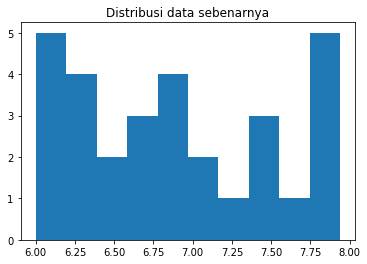

In [ ]:
# Visualisasi data
plt.hist(return_ind)
plt.title("Distribusi data sebenarnya")
plt.show()

Berdasarkan hasil visualisasi data jauh untuk bisa dikatakan sebagai distribusi normal. Selanjutnya akan di terapkan CLT, dan memvisualisasikan hasilnya.

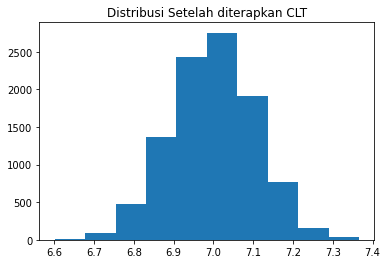

The mean of the sample means is 6.999333620490925


In [ ]:
# Proses CLT menggunakan Python
seed(1)

# Menghitung rata-rata dari 30 saham yang dibangkitkan sebanyak 1000 kali
means = [mean(random_floats(6, 8, 30)) for _ in range(10000)]

# plot the distribution of sample means
plt.hist(means)
plt.title("Distribusi Setelah diterapkan CLT")
plt.show()

print('The mean of the sample means is {}'.format(mean(means)))

Terbukti bahwa dengan menggunakan CLT, distribusi yang semula tidak berdistribusi normal, dengan menggunakan distribusi mean sampel maka menyerupai distribusi Normal.


## Statistics Inference

### Point Estimation
Point Estimation berkaitan dengan penggunaan data sampel untuk mengukur nilai tunggal yang berfungsi sebagai nilai perkiraan atau estimasi terbaik dari parameter populasi yang tidak diketahui.

Tiga estimasi poin penting yang diperkenalkan dalam bab ini adalah untuk rata-rata populasi ($\mu$), varians populasi ($\sigma^2$), dan proporsi populasi ($P$). \\


<img src=https://i1.wp.com/itfeature.com/wp-content/uploads/2019/07/ci11.png>


[link](https://i1.wp.com/itfeature.com/wp-content/uploads/2019/07/ci11.png?resize=644%2C216)

#### **Ilustrasi**

Terdapat distribusi dari beberapa customer dengan umur tertentu serta data terlabel fraud dan non fraud
<br>
a. Berapa estimasi poin dari usia yang kategorinya fraud dan non fraud ?
<br>
b. Berapakah Interval konfidensi dari fraud? serta interval konfidensi dengan kategori non fraud?

In [ ]:
# Mendefinisikan Data
fraud_data = pd.DataFrame({'Age':[20,23,35,40,45,15,20,60,24,18,35,40,41,38,59],
                           'Fraud':[0,0,0,1,1,0,0,1,0,0,0,1,1,0,1]})
fraud_data

,Age,Fraud
0,20,0
1,23,0
2,35,0
3,40,1
4,45,1
5,15,0
6,20,0
7,60,1
8,24,0
9,18,0


A. Mencari estimasi poin dari usia dengan kategori fraud dan non fraud

In [ ]:
# Mendeteksi Data Usia dengan label Fraud
age_fraud = fraud_data[fraud_data["Fraud"] == 1]['Age']

print("Sempel usia dengan kategori fraud")
age_fraud

Sempel usia dengan kategori fraud


3     40
4     45
7     60
11    40
12    41
14    59
Name: Age, dtype: int64

In [ ]:
# Estimasi poin usia kategori fraud
mean_age_fraud = age_fraud.mean()
print('Estimasi poin untuk usia dengan kategori fraud adalah ' + str(mean_age_fraud))

Estimasi poin untuk usia dengan kategori fraud adalah 47.5


In [ ]:
# Mencari sempel Usia dengan label non fraud
age_non_fraud = fraud_data[fraud_data["Fraud"] == 0]['Age']

# Estimasi poin usia kategori fraud
mean_age_non_fraud = age_non_fraud.mean()
print('Estimasi poin untuk usia dengan kategori non fraud adalah ' + str(mean_age_non_fraud))

Estimasi poin untuk usia dengan kategori non fraud adalah 25.333333333333332


B. Mencari Interval konfidensi dari fraud dan non fraud.

In [ ]:
# Interval konfidensi dengan kategori fraud
# Mencari standart deviation usia dengan kategori fraud
std_age_fraud = fraud_data[fraud_data["Fraud"] == 1]['Age'].std()
print('Standar deviasi dari usia berkategori fraud adalah ' + str(std_age_fraud))

# Sample size
n = np.sqrt(len(fraud_data))

# Margin error
e = 1.96 * (std_age_fraud / n)

# Confidence interval
print('Interval konfidensi 95% dari usia berkategori fraud :')
print(str(mean_age_fraud - e) + ', ' + str(mean_age_fraud + e))

Standar deviasi dari usia berkategori fraud adalah 9.481561052906848
Interval konfidensi 95% dari usia berkategori fraud :
42.701668067616275, 52.298331932383725


In [ ]:
# Interval konfidensi dengan kategori non fraud
# Mencari standart deviation usia dengan kategori non fraud
std_age_non_fraud = fraud_data[fraud_data["Fraud"] == 0]['Age'].std()
print('Standar deviasi dari usia berkategori non fraud adalah ' + str(std_age_non_fraud))

# Margin error
e = 1.96 * (std_age_non_fraud / n)

# Confidence interval
print('Interval konfidensi 95% dari usia berkategori non fraud :')
print(str(mean_age_non_fraud - e) + ', ' + str(mean_age_non_fraud + e))

Standar deviasi dari usia berkategori non fraud adalah 8.455767262643882
Interval konfidensi 95% dari usia berkategori non fraud :
21.05412468375025, 29.612541982916415


## Z Score
Z-Score adalah jumlah deviasi standar dari rata-rata untuk suatu titik data. Z-score membantu menunjukkan seberapa tidak biasa atau biasa suatu titik data dari nilai lainnya. Z-score harus digunakan dengan kurva distribusi normal.

#### **Ilustrasi**

Kita akan membuat DataFrame untuk mensimulasikan data konsumen dimana mereka diminta untuk meletakkan lengan mereka dalam posisi fleksibel (mirip dengan membawa keranjang belanjaan). Kemudian setiap konsumen ditawari beberapa pilihan antara vice product dan virtue product (misalnya, film tiket vs. kupon belanja, bayar nanti dengan jumlah yang lebih besar vs. bayar sekarang). Berdasarkan pilihan tersebut, pilihan dari konsumen ditentukan dengan score yang memiliki skala antara 0 hingga 100 (di mana skor yang lebih tinggi menunjukkan preferensi yang lebih besar untuk untuk memilih vice product). Bagaimana hasilnya?

In [ ]:
# Simulasi Z-score
seed(42)

# Inisiasi ukuran populasi
population_size = 5000

# Membuat dataframe berdasarkan nilai random
df_score = pd.DataFrame(data = {'Score': np.random.normal(loc = 66, scale = 2.9, size = population_size)})

# Display data
df_score

,Score
0,67.440471
1,65.599034
2,67.878297
3,70.416787
4,65.320955
...,...
4995,65.858001
4996,68.063091
4997,75.027440
4998,68.343305


In [ ]:
# Memastikan ukuran dataframe
df_score.shape

(5000, 1)

Berdasarkan pengecekan ukuran didapat hasil yang sama dengan apa yang telah kita inisiasi sebelumnya.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribusi dari skor')

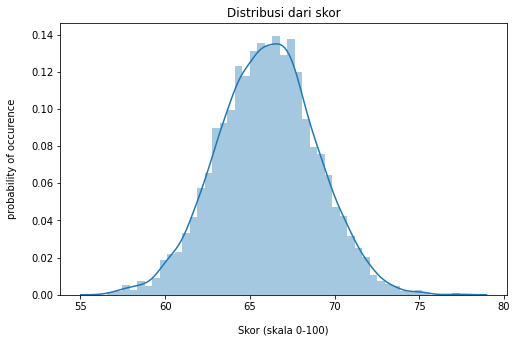

In [ ]:
# Visualisasi data
# Setting ukuran gambar
plt.figure(figsize=(8,5))

# Plotting data
sns.distplot(df_score['Score'])
plt.xlabel("Skor (skala 0-100)", labelpad = 14)
plt.ylabel("probability of occurence", labelpad = 14)
plt.title("Distribusi dari skor")

In [ ]:
# Mendapatkan mean dan standart deviasi dari data
mean_score = df_score['Score'].mean()
std_score =df_score['Score'].std()
print("Mean data :", mean_score)
print("Standart Deviasi data :", std_score)

Mean data : 66.01624559725403
Standart Deviasi data : 2.889791503580723


Selanjutnya, kita akan mencari nilai dari Z-score dengan rumus dibawah ini

$z-{score}=\frac{x-\mu}{\sigma}$

In [ ]:
df_score['z_score'] = (df_score['Score'] - mean_score) / std_score

# Menampilkan dataframe
df_score.head()

,Score,z_score
0,67.440471,0.492847
1,65.599034,-0.144374
2,67.878297,0.644355
3,70.416787,1.522788
4,65.320955,-0.240602


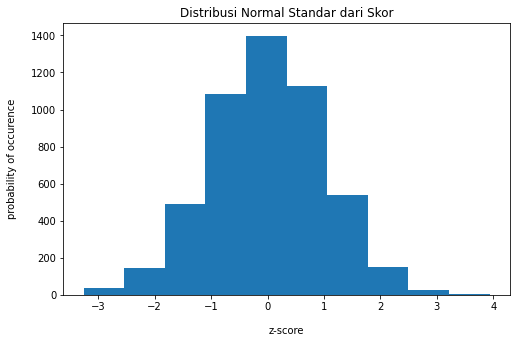

In [ ]:
# Setting ukuran image
plt.figure(figsize=(8,5))

# Plotting data
plt.hist(df_score['z_score'])
plt.xlabel("z-score", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribusi Normal Standar dari Skor")
plt.show()